In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [213]:
df = pd.read_csv('KaggleV2-May-2016.csv')
#print df.head(10)
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [214]:
df['PatientId'] = df['PatientId'].astype(int) 

In [215]:
print df.PatientId.nunique()

62299


In [267]:
df.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
954,1423328986773,5217179,M,2016-01-05T11:53:44Z,2016-04-29T00:00:00Z,84,SANTO ANDRÉ,0,1,1,0,1,1,No
953,4616857575498,5218520,F,2016-01-05T15:02:46Z,2016-04-29T00:00:00Z,83,REDENÇÃO,0,1,0,0,0,1,No
959,55589627937198,5235449,F,2016-01-11T08:52:35Z,2016-04-29T00:00:00Z,74,MONTE BELO,0,0,0,0,0,1,No
957,91896944762663,5235643,F,2016-01-11T09:08:10Z,2016-04-29T00:00:00Z,70,GURIGICA,0,1,1,0,0,1,No
958,1534481873995,5235655,F,2016-01-11T09:09:10Z,2016-04-29T00:00:00Z,87,JUCUTUQUARA,0,0,0,0,0,1,No


In [217]:
df.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',
                         'No-show': 'NoShow',
                         'PatientId': 'PatientID'}, inplace = True)

print ("Basic statistical description of Training sets:")
df.describe()

Basic statistical description of Training sets:


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [255]:

# Sort by date
df.sort_values(["AppointmentDay","ScheduledDay"], inplace=True, ascending=True)  


In [157]:
# View range of variables / unique values
print('Age:\t%s'%sorted(df.Age.unique()))
print()
print('Gender:\t%s' %df.Gender.unique())
print()
print('Number of neighbourhoods:\t%s' %df.Neighbourhood.nunique())
print('Neighbourhood:\t%s' %sorted(df.Neighbourhood.unique()))
print()
print('Scholarship:\t%s' %df.Scholarship.unique())
print('Hypertension:\t%s' %df.Hypertension.unique())
print('Diabetes:\t%s' %df.Diabetes.unique())
print('Alcoholism:\t%s' %df.Alcoholism.unique())
print('Handicap:\t%s' %df.Handicap.unique())
print('SMS_received:\t%s' %df.SMS_received.unique())
print('NoShow:\t%s' %df.NoShow.unique())


Age:	[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
()
Gender:	['F' 'M']
()
Number of neighbourhoods:	81
Neighbourhood:	['AEROPORTO', 'ANDORINHAS', 'ANT\xc3\x94NIO HON\xc3\x93RIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATO\xc3\x8dRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLA\xc3\x87\xc3\x83O', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SU\xc3\x81', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE S\xc3\x83O JO\xc3\x83O', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VIT\xc3\x93RIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MA

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [158]:
df.NoShow.value_counts()


No     88208
Yes    22319
Name: NoShow, dtype: int64

The target is unbalanced distributed. 

In [44]:
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
NoShow            0
dtype: int64

#### Time

In [46]:
# Convert dates

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)

# New feature = number of days between ScheduledDay and AppointmentDay
df['Time'] = df['ScheduledDay'].sub(df['AppointmentDay'], axis = 0)
df['Time'] = df['Time'] / np.timedelta64(1, 'D')
df['Time'] = df['Time'].abs().apply(np.floor)

In [5]:
#df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

#df['weekday'] = df['AppointmentDay'].dt.dayofweek


In [61]:
df['weekday'] = df['AppointmentDay'].dt.dayofweek
df['month'] = pd.DatetimeIndex(df['AppointmentDay']).month


In [115]:
#df['month'].unique()
df['weekday'].unique()

array([4, 0, 1, 2, 3, 5])

In [77]:
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['NoShow']).reset_index()
    #print df1.info()
    #print df1.columns.values
    
    df1['probShowUp'] = df1['No'] / (df1['No'] + df1['Yes'])
    #print  df1
    return df1[[group_by, 'probShowUp']]

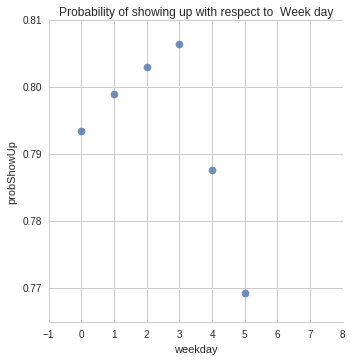

In [117]:
sns.lmplot(data = probStatus(df, 'weekday'), x = 'weekday', y = 'probShowUp', fit_reg = False, scatter_kws={'s':60})
sns.plt.xlim(-1, 8)
sns.plt.title('Probability of showing up with respect to  Week day')
sns.plt.show()

In [80]:
def probStatus1(dataset, group_by1, group_by2):
    df1 = pd.crosstab(index = [dataset[group_by1],dataset[group_by2]], columns = dataset['NoShow']).reset_index()
    #print df1.info()
    #print df1.columns.values
    
    df1['probShowUp'] = df1['No'] / (df1['No'] + df1['Yes'])
    #print  df1
    return df1


In [75]:
#ttt = probStatus1(df, 'weekday', 'month')

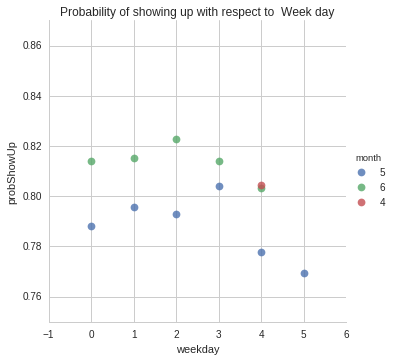

In [116]:
sns.lmplot(data = probStatus1(df, 'weekday','month'), x = 'weekday', 
           y = 'probShowUp', hue='month', fit_reg = False, scatter_kws={'s':60})

sns.plt.xlim(-1, 6)
sns.plt.ylim(0.75, 0.87)
sns.plt.title('Probability of showing up with respect to  Week day')
sns.plt.show()

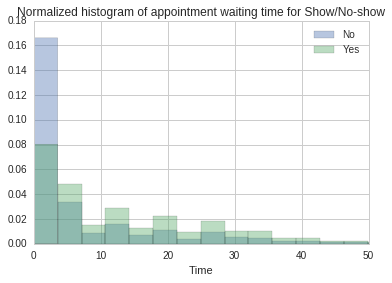

In [74]:
tmp  = df.groupby(['NoShow'])
for name, group in tmp:
    #print name
    #print group.info()
    sns.distplot(group['Time'], kde=False, norm_hist = True, label= str(name)) 
    plt.xlim(0,50)
                 
plt.legend()
plt.title("Normalized histogram of appointment waiting time for Show/No-show")

Clearly, Awaiting time is strongly correlated to NoShow rate. The shorter waiting time shows a higer showing up rate. 


#### Age and Gender

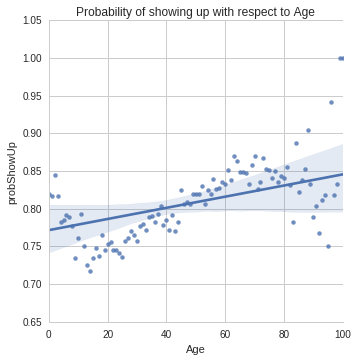

In [101]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.ylim(0.65, 1.05)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()


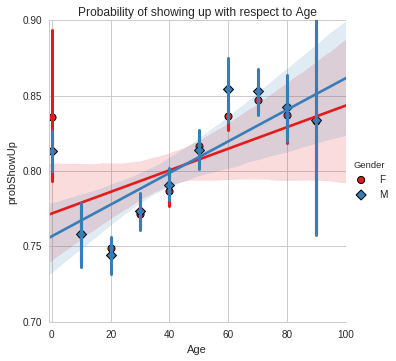

In [126]:
sns.lmplot(data = probStatus1(df, 'Age','Gender'), x = 'Age', 
           y = 'probShowUp', hue='Gender', x_bins=range(0,100, 10), palette="Set1",
           fit_reg = True, markers=["o", "D"], scatter_kws={'linewidths':1,'edgecolor':'k'})
sns.plt.xlim(-1, 100)
sns.plt.ylim(0.7,0.9)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

#### Handicap

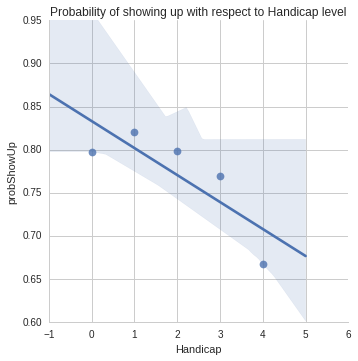

In [112]:
sns.lmplot(data = probStatus(df, 'Handicap'), x = 'Handicap', 
           y = 'probShowUp', palette="Set1", scatter_kws={'s':60},
           fit_reg = True)
sns.plt.xlim(-1, 6)
sns.plt.ylim(0.6, 0.95)
sns.plt.title('Probability of showing up with respect to Handicap level')
sns.plt.show()

#### Neighbourhood dependence

In [151]:
df['Neighbourhood_num'] = df['Neighbourhood'].astype("category").cat.codes


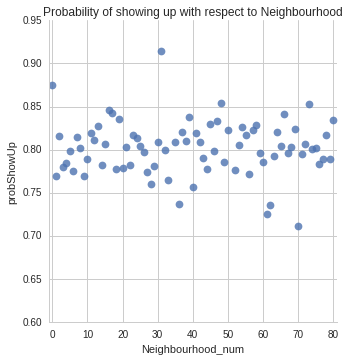

In [154]:
sns.lmplot(data = probStatus(df, 'Neighbourhood_num'), x = 'Neighbourhood_num', 
           y = 'probShowUp', palette="Set1", scatter_kws={'s':60},
           fit_reg = False)
sns.plt.xlim(-1, 81)
sns.plt.ylim(0.6, 0.95)
sns.plt.title('Probability of showing up with respect to Neighbourhood')
sns.plt.show()

#### Check other Categorical variable dependence:
    'Diabetes', 'Alcoholism', 'Hypertension', 'SMS_received',  'Scholarship

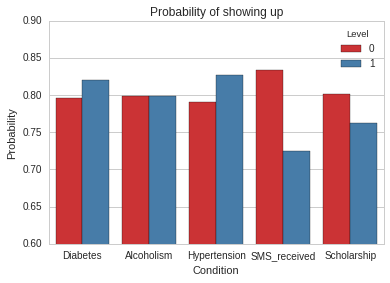

In [168]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.NoShow == 'No')])
            row.update({'Level': level, 'ShowupProbability': n / float(total)})
            rows.append(row)
    return pd.DataFrame(rows)


sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension',
                                         'SMS_received',  'Scholarship']),
            x = 'Condition', y = 'ShowupProbability', hue = 'Level', palette = 'Set1')
#sns.plt.xlim(-1, 6)
sns.plt.ylim(0.6, 0.9)
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

Except alcoholism, other categorical variables seem more or less influence the showup probability

In [172]:
df['NoShow'] = df['NoShow'].astype("category").cat.codes
# Yes - 1 No show;  No - 0 Show
# New feature = missed previous appointment
df['prev_appMissed'] = df.groupby('PatientID')['NoShow'].apply(lambda x: x.shift(-1) == 1)
df.prev_appMissed = df.prev_appMissed.astype(int)



In [173]:
# New feature = number of appointments missed by patient
df['n_appMissed'] = df.groupby('PatientID')['NoShow'].apply(lambda x.shift(-1): x.cumsum())
df['n_appPrevious'] = df.groupby('PatientID')['NoShow'].apply(lambda x: (x.shift(-1)*0+1).cumsum())



df['appPreviousMissedRatio'] = df['n_appMissed']/df['n_appPrevious'].astype(float)

In [184]:
df['n_appPrevious'] = df.groupby('PatientID')['NoShow'].apply(lambda x: (x*0+1).cumsum())


In [218]:
y = df.groupby('PatientID')['AppointmentID'].nunique()
print('Mean number of appointments per patient per day:\t%s' %np.mean(y))


Mean number of appointments per patient per day:	1.77413762661


(0, 10)

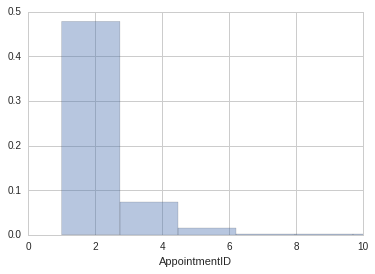

In [250]:
sns.distplot(y, kde=False, norm_hist = True) 
plt.xlim(0,10)

In [241]:
tmp = y.value_counts(sort=True)
df1 = pd.DataFrame({'patientTotApp':tmp.index, 'histNum':tmp.values})

In [245]:
print df1.histNum.sum()

62299


In [253]:
tmp

1     37920
2     13895
3      5500
4      2367
5      1119
6       553
7       306
8       202
9       104
10       85
11       63
12       36
13       35
14       22
15       15
17       10
16       10
20        8
18        8
19        6
62        4
21        3
23        2
30        2
46        2
38        2
42        2
34        2
57        1
35        1
65        1
29        1
24        1
33        1
88        1
51        1
37        1
55        1
70        1
54        1
22        1
84        1
50        1
40        1
Name: AppointmentID, dtype: int64

In [187]:
df['n_appPrevious'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

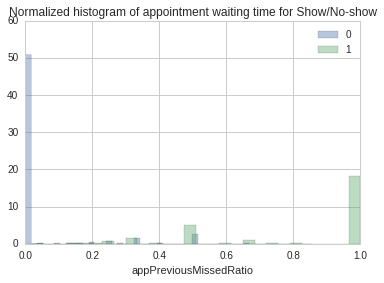

In [179]:
tmp  = df.groupby(['NoShow'])
for name, group in tmp:
    #print name
    #print group.info()
    sns.distplot(group['appPreviousMissedRatio'], kde=False, norm_hist = True, label= str(name)) 
    plt.xlim(0,1)
                 
plt.legend()
plt.title("Normalized histogram of appointment waiting time for Show/No-show")

Mean number of appointments per patient :	1.77413762661


<function matplotlib.pyplot.show>

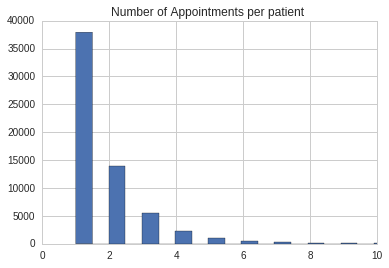

In [197]:
y = df.groupby('PatientID')['AppointmentID'].nunique()
print('Mean number of appointments per patient :\t%s' %np.mean(y))

plt.figure(1)

plt.hist(y, bins = y.nunique()*4)
plt.title("Number of Appointments per patient ")
plt.xlim(0,10)
plt.show


Most patient has only one appointment

In [256]:
df_multiApp = df.groupby('PatientID').filter(lambda x: len(x) > 1)

In [252]:
df_multiApp.shape

(72607, 14)

In [3]:
import pandas as pd
dftest = pd.DataFrame({'dat': ['2016-06-29T00:00:00Z', '2016-06-29T00:00:00Z', '2016-04-30T00:00:00Z', 
                               '2016-05-01T00:00:00Z', '2016-05-29T00:00:00Z', 
                               '2016-05-30T00:00:00Z', '2016-03-29T00:00:00Z'],
                       'id': ['a', 'a', 'a', 'b', 'b','b','c'], 's':[1,2,3,4,5,6, 7]})

In [11]:
data= dftest.groupby(['id','dat'])['s']
dftest['nnn'] = data.transform(lambda x: x.nunique())

In [14]:
dftest

,dat,id,s,nnn
0,2016-06-29T00:00:00Z,a,1,2
1,2016-06-29T00:00:00Z,a,2,2
2,2016-04-30T00:00:00Z,a,3,1
3,2016-05-01T00:00:00Z,b,4,1
4,2016-05-29T00:00:00Z,b,5,1
5,2016-05-30T00:00:00Z,b,6,1
6,2016-03-29T00:00:00Z,c,7,1


In [13]:
dftest.groupby(['id','dat'])['s'].nunique()

id  dat                 
a   2016-04-30T00:00:00Z    1
    2016-06-29T00:00:00Z    2
b   2016-05-01T00:00:00Z    1
    2016-05-29T00:00:00Z    1
    2016-05-30T00:00:00Z    1
c   2016-03-29T00:00:00Z    1
Name: s, dtype: int64

In [301]:
dftest.sort_values(["dat"], inplace=True, ascending=True)  
dftest

,dat,id,s
1,2016-04-30T00:00:00Z,a,1
2,2016-05-01T00:00:00Z,b,0
3,2016-05-29T00:00:00Z,b,1
4,2016-05-30T00:00:00Z,b,0
0,2016-06-29T00:00:00Z,a,0


In [302]:
dftest['new'] = dftest.groupby('id')['s'].apply(lambda x: x.shift(1))
dftest

,dat,id,s,new
1,2016-04-30T00:00:00Z,a,1,NaN
2,2016-05-01T00:00:00Z,b,0,NaN
3,2016-05-29T00:00:00Z,b,1,0.0
4,2016-05-30T00:00:00Z,b,0,1.0
0,2016-06-29T00:00:00Z,a,0,1.0


In [303]:
dftest[dftest.new.notnull()]

,dat,id,s,new
3,2016-05-29T00:00:00Z,b,1,0.0
4,2016-05-30T00:00:00Z,b,0,1.0
0,2016-06-29T00:00:00Z,a,0,1.0


In [304]:
dftest['missedNum'] = dftest[dftest.new.notnull()].groupby('id')['new'].apply(lambda x: x.cumsum())

In [305]:
dftest['AllNum'] = dftest[dftest.new.notnull()].groupby('id')['new'].apply(lambda x: (x*0+1).cumsum())

In [309]:
dftest['MissedRatio'] = dftest['missedNum']/dftest['AllNum']

In [310]:
dftest

,dat,id,s,new,missedNum,AllNum,MissedRatio
1,2016-04-30T00:00:00Z,a,1,NaN,NaN,NaN,NaN
2,2016-05-01T00:00:00Z,b,0,NaN,NaN,NaN,NaN
3,2016-05-29T00:00:00Z,b,1,0.0,0.0,1.0,0.0
4,2016-05-30T00:00:00Z,b,0,1.0,1.0,2.0,0.5
0,2016-06-29T00:00:00Z,a,0,1.0,1.0,1.0,1.0


In [254]:
df.shape

(110527, 14)

In [206]:
patient = pd.DataFrame(y, column=['PatientID', 'AppNum'])

TypeError: __init__() got an unexpected keyword argument 'column'

In [205]:
patient

,AppointmentID
PatientID,
3.921784e+04,1
4.374176e+04,1
9.377953e+04,1
1.417242e+05,1
5.376153e+05,1
5.628261e+06,1
1.183186e+07,1
2.263866e+07,2
5.216894e+07,2


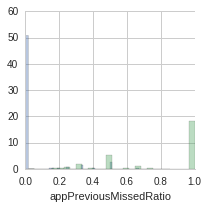

In [177]:
#g = sns.FacetGrid(df_rtn, hue="group")
#g = g.map(sns.distplot, "variable")

g = sns.FacetGrid(df, hue='NoShow')
g = g.map(sns.distplot,'appPreviousMissedRatio',  kde=False, norm_hist = True)

In [ ]:
tmp  = df.groupby(['NoShow'])
for name, group in tmp:
    #print name
    #print group.info()
    sns.distplot(group['Time'], kde=False, norm_hist = True, label= str(name)) 
    plt.xlim(0,50)
                 
plt.legend()
plt.title("Normalized histogram of appointment waiting time for Show/No-show")

In [174]:
sns.distplot(df['appPreviousMissedRatio'], hue='NoShow', kde=False, norm_hist = True)

TypeError: distplot() got an unexpected keyword argument 'hue'

In [139]:
df['NoShow'] = df['NoShow'].astype("category").cat.codes
# Yes - 1 No show;  No - 0 Show

In [140]:
# Create dummy variables for categorical variables
# One-hot Encoding: dp.get_dummies()

def dummies(df, columns = []):

    for column in columns:
        df[column] = df[column].astype('category').cat.codes
        df = pd.concat((df, pd.get_dummies(df[column], prefix = column)), axis = 1)
        #del df[column]
    return df

In [118]:
#pd.DataFrame.hist(df['Time'])
#sns.distplot(df['Time'], kde=False)
#column='Gender'
#df[column] = df[column].astype("category").cat.codes
#tmp = pd.Categorical(df['Gender'])
#tmp.cat.codes

In [141]:
df = dummies(df, columns=['Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 
                          'Diabetes','Alcoholism', 'Handicap', 'SMS_received'])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 954 to 87223
Columns: 115 entries, PatientID to SMS_received_1
dtypes: datetime64[ns](2), float64(2), int32(1), int64(3), int8(9), uint8(98)
memory usage: 18.4 MB


In [143]:
df.columns.values

array(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'NoShow', 'Time', 'weekday', 'month', 'Gender_0',
       'Gender_1', 'Neighbourhood_0', 'Neighbourhood_1', 'Neighbourhood_2',
       'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5',
       'Neighbourhood_6', 'Neighbourhood_7', 'Neighbourhood_8',
       'Neighbourhood_9', 'Neighbourhood_10', 'Neighbourhood_11',
       'Neighbourhood_12', 'Neighbourhood_13', 'Neighbourhood_14',
       'Neighbourhood_15', 'Neighbourhood_16', 'Neighbourhood_17',
       'Neighbourhood_18', 'Neighbourhood_19', 'Neighbourhood_20',
       'Neighbourhood_21', 'Neighbourhood_22', 'Neighbourhood_23',
       'Neighbourhood_24', 'Neighbourhood_25', 'Neighbourhood_26',
       'Neighbourhood_27', 'Neighbourhood_28', 'Neighbourhood_29',
       'Neighbourhood_30', 'Neighbourhood_31', 'Neighbourhood_32',


In [ ]:
df

In [ ]:
sns.lmplot(data = probStatus(df, 'Neighbourhood_num'), x = 'Neighbourhood_num', 
           y = 'probShowUp', palette="Set1", scatter_kws={'s':60},
           fit_reg = False)
sns.plt.xlim(-1, 81)
sns.plt.ylim(0.6, 0.95)
sns.plt.title('Probability of showing up with respect to Neighbourhood')
sns.plt.show()

In [162]:
df.prev_appMissed.unique()

array([0, 1])

In [171]:
df['n_appMissed'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [ ]:

sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension',
                                         'SMS_received',  'Scholarship']),
            x = 'Condition', y = 'ShowupProbability', hue = 'Level', palette = 'Set2')
#sns.plt.xlim(-1, 6)
sns.plt.ylim(0.6, 0.9)
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

In [ ]:
sns.barplot(data=df, x= '')

Mean number of appointments per patient:	1.63418353425
Median number of appointments per patient:	1.0


<function matplotlib.pyplot.show>

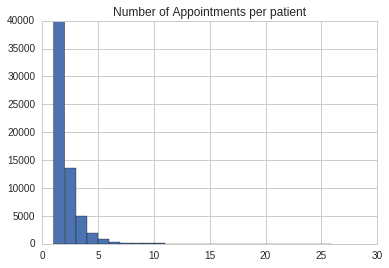

In [185]:
# Histogram of number of appointments per patient
x = df.groupby('PatientID')['AppointmentDay'].nunique()
print('Mean number of appointments per patient:\t%s' %np.mean(x))
print('Median number of appointments per patient:\t%s' %np.median(x))

plt.figure(1)
plt.hist(x, bins = x.nunique())
plt.title("Number of Appointments per patient")
plt.show

In [146]:
x = df.groupby('PatientID')['AppointmentDay']

In [142]:
# Print basic information
print("Number of listed PatientID:\t%s" %df.shape[0])
print("Number of unique PatientId:\t%s" %len(df.PatientId.unique()))
print("Number of unique AppointmentID:\t%s" %len(df.AppointmentID.unique()))


Number of listed PatientID:	110527
Number of unique PatientId:	62299
Number of unique AppointmentID:	110527


Mean number of appointments per patient per day:	1.08564159987


<function matplotlib.pyplot.show>

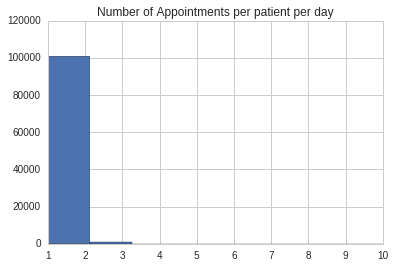

In [158]:
y = df.groupby(['PatientID','AppointmentDay'])['AppointmentID'].nunique()
print('Mean number of appointments per patient per day:\t%s' %np.mean(y))

plt.figure(1)
plt.hist(y, bins = y.nunique())
plt.title("Number of Appointments per patient per day")
plt.show


In [165]:
sns.countplot(df.groupby(['PatientID','AppointmentDay']).groups, hue=df.NoShow)

TypeError: Argument 'obj' has incorrect type (expected list, got dict)

In [ ]:
df.groupby(['PatientID','AppointmentDay'])[]



In [160]:
print y.unique()

[ 1  2  4  3  5  6  8 10]
